<a href="https://colab.research.google.com/github/Niitin-01/Unsupervised-Machine-Learning/blob/main/Anomaly_detection_using_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [15]:
normal_data = np.random.normal(0, 2, (1000, 2))
anomaly_data = np.random.uniform(-20, 20, (50, 2))

data = np.vstack((normal_data, anomaly_data))

labels = np.array([0]*1000+[1]*50)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.3, random_state=42, stratify=labels)

model = DecisionTreeClassifier(max_depth=10, random_state=42)

model.fit(X_train, Y_train)

predictions = model.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       300
           1       1.00      0.73      0.85        15

    accuracy                           0.99       315
   macro avg       0.99      0.87      0.92       315
weighted avg       0.99      0.99      0.99       315



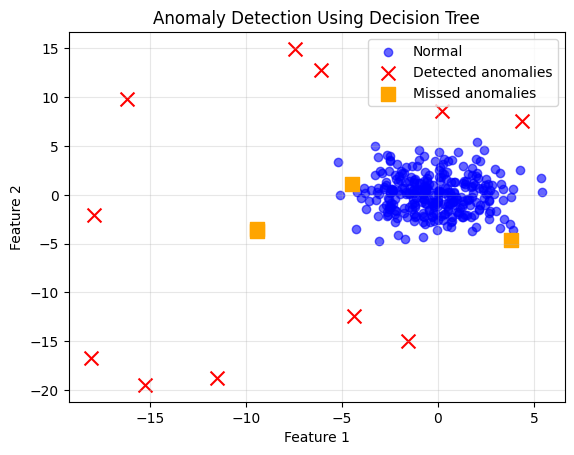

In [17]:
normal_mask = (Y_test == 0)
plt.scatter(X_test[normal_mask, 0], X_test[normal_mask, 1], c='blue', label='Normal', alpha=0.6)
correct_anomalies = (predictions == 1) & (Y_test == 1)
plt.scatter(X_test[correct_anomalies, 0], X_test[correct_anomalies,1], c='red', label='Detected anomalies', marker='x', s=100)
missed_anomalies = (predictions == 0) & (Y_test == 1)
plt.scatter(X_test[missed_anomalies, 0], X_test[missed_anomalies,1], c='orange', label='Missed anomalies', marker='s', s=100)
plt.title('Anomaly Detection Using Decision Tree')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()